<a href="https://colab.research.google.com/github/kimjjoy2/Test/blob/master/%5B1%5D_Textpreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text preprocessing
<br>
제작자: Park Chanjun (박찬준) <br>
소속: Korea University Natural Language Processing & Artificial Intelligence Lab (고려대학교 자연언어처리&인공지능 연구실)<br>
Email: bcj1210@naver.com<br>

## 전통적인 자연어처리 단계




## 어절 분리
어절은 영어에서 띄어쓰기 단위라고 생각하면 이해하기 쉽습니다.

In [16]:
import nltk
nltk.download('punkt')

sentences="My name is park hahahah's"
tokens=nltk.word_tokenize(sentences)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['My', 'name', 'is', 'park', 'hahahah', "'s"]


## 문장 분리
NLTK로 문장 분리도 가능합니다.

In [18]:
import nltk
nltk.download('punkt')

sentences="My name is park. How old are you."
sen=nltk.sent_tokenize(sentences)
print(sen)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['My name is park.', 'How old are you.']


##형태소
뜻을 가진 가장 작은 말의 단위 입니다.


입력으로 word_tokenize를 통해 토큰으로 나눈 Token 리스트를 넣어주어야 합니다.<br>
출력은 형태소 품사태깅 된 결과가 나옵니다.

In [19]:
import nltk
nltk.download('averaged_perceptron_tagger')

sentence="my name is jack and i am 22 years old and my major is natural language processing"

tokens=nltk.word_tokenize(sentence)
tagged=nltk.pos_tag(tokens)

print(tagged) 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[('my', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('jack', 'NN'), ('and', 'CC'), ('i', 'NN'), ('am', 'VBP'), ('22', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('my', 'PRP$'), ('major', 'JJ'), ('is', 'VBZ'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN')]


##개체명 인식

컴퓨터가 사람이름,장소,지역,조직체를 인식할 수 있을까요?

즉 Tom lives in NewYork이라는 문장이 있을 때 Tom이 사람이고 NewYork이 장소다는 것을 컴퓨터가 알아차릴 수 있을까요?

그것을 가능하게 하는 것이 바로 NER(Name Entity Recogniton)즉 개체명 인식입니다.

####Named Entity (개체명) : 사람, 조직, 장소 이름 등 이름을 가진 개체

####Name Entity Recognition (개체명 인식) : 텍스트에서 개체명을 인식하고, 그 유형을 알려줌
<br>

개체명인식을 진행하기 위해선 input 데이터로 형태소태깅 된 리스트가 들어와야 됩니다.
 
즉 개체명인식을 진행하기 위해 먼저 nltk.word_tokenize를 진행하고 nltk.pos_tag를 진행한 후 이것을 input으로 넣어야 함을 알 수 있습니다.

In [27]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

sent="Mark is studying at Stanford University in California"

tokens=nltk.word_tokenize(sent)
tagged=nltk.pos_tag(tokens)
entities=nltk.chunk.ne_chunk(tagged)

print(entities)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
(S
  (PERSON Mark/NNP)
  is/VBZ
  studying/VBG
  at/IN
  (ORGANIZATION Stanford/NNP University/NNP)
  in/IN
  (GPE California/NNP))


## Edit Distance

NLTK를 통하여 Edit Distance에 대해서 살펴보려고 합니다.

간단히 생각해 2개의 단어가 얼마나 다르냐를 숫자로 표현해주는 것이 Edit Distance입니다.

 

예를 들어 CAT 과  HAT 두단어의 차이는 각 단어의 첫글자인 C와H입니다.

즉 1개의 문자만이 차이가 나죠!!

따라서 CAT과 HAT의 Edit Distance는 1 이되는 것 입니다.

Edit Distance에는 3가지 연산이 있습니다.


### Insertion
### Deletion
### Substitution

​

즉 삽입, 삭제, 교체 총 이렇게 3가지 연산이 존재합니다.


In [30]:
import nltk 
from nltk.metrics import edit_distance 

print(edit_distance("CAT","HAT"))
print(edit_distance("hello","hllllpo"))


1
3


## Stemming
stem이라는 영어단어 들어보셨나요?

(식물의) 줄기라는 뜻을 가진 영어단어 인데요.언어학에서는 stem을 어간이라고 합니다.

어간은 굴절하는 단어에서 변화하지 않는 부분을 의미합니다.

###스태밍(Stemming)이란 어간추출을 의미합니다 !!

쉽게 말해 형태가 변한 단어로부터 군더더기를 제거하고 그 단어의 원래 모습을 추출하는 것을 말합니다.

예를 들어 going이라는 단어가 있다면 Stemming을 진행할시 go

Computers라는 단어를 Stemming을 진행할 시 Comput 를 추출하는 과정을 Stemming이라고 합니다 .


포터 스태밍 알고리즘(Porter Stemming Algorithm) 은 Stemming에서 가장 유명한 알고리즘입니다.

In [31]:
import nltk 
from nltk.stem import PorterStemmer

pst=PorterStemmer()

print(pst.stem("computers"))
print(pst.stem("going"))


comput
go


## Lemmatization

Lemmatization이란 문장 속에서 다양한 형태로 활용된(inflected) 단어의 표제어(lemma)를 찾는 일을 뜻합니다. <br> 
여기서 말하는 표제어란 사전에서 단어의 뜻을 찾을 때 쓰는 기본형이라고 생각하면 됩니다.

즉 Lemmatization은 단어의 원형을 추출해주는 녀석이라고 생각하면 이해하기 쉽습니다.


예를들어 is를 Lemmatization하면 be가 되고 ate을 Lemmatization하면 eat이 됩니다.

In [32]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

wlem=WordNetLemmatizer()

print(wlem.lemmatize("ate",pos='v'))
print(wlem.lemmatize("is",pos='v'))
print(wlem.lemmatize("are",pos='v'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
eat
be
be


## Stopword

불용어는 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어입니다.


{'above', 'doing', 'too', 'can', 'd', 't', 'then', 'what', 'same', 'himself', 'but', 'with', 'on', 'when', 'so', 'isn', 'his', 'further', 'been', 'being', 'our', 'because', 'are', 'from', 'mustn', 'at', 'between', 'here', 'most', 'ours', 'again', 'shouldn', 'have', 'both', 'below', 'against', 'few', 'wasn', 'those', 'hadn', 'once', 'don', 'ain', 'for', 'under', 'o', 're', 'yourselves', 'them', 'themselves', 've', 'about', 'your', 'ourselves', 'who', 'after', 'or', 'he', 'over', 'this', 'how', 'myself', 'into', 'in', 'such', 'aren', 'hasn', 'before', 'whom', 'won', 's', 'were', 'only', 'herself', 'we', 'that', 'was', 'had', 'no', 'of', 'during', 'down', 'has', 'off', 'while', 'where', 'a', 'if', 'until', 'weren', 'be', 'having', 'theirs', 'doesn', 'will', 'to', 'just', 'her', 'ma', 'll', 'there', 'and', 'does', 'other', 'their', 'own', 'why', 'itself', 'its', 'each', 'by', 'not', 'she', 'some', 'him', 'very', 'm', 'should', 'now', 'couldn', 'yourself', 'these', 'as', 'didn', 'an', 'nor', 'is', 'yours', 'did', 'the', 'do', 'my', 'all', 'needn', 'y', 'which', 'up', 'shan', 'haven', 'through', 'me', 'out', 'mightn', 'wouldn', 'they', 'i', 'you', 'hers', 'it', 'more', 'any', 'am', 'than'}

 

영어에 불용어의 종류로는 이렇게 많은 단어들이 있으며 대부분 검색 시 의미없는 단어들입니다.

In [35]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop=set(stopwords.words('english'))
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{"isn't", "you're", 'under', 'being', "wasn't", 'any', 'down', 'ma', 'are', "mustn't", "you'd", 'm', 'their', 'than', 'y', 'mightn', 'is', 'through', 'more', 'out', 'shan', 'what', 'between', 'again', 'few', 'during', 've', 'am', "it's", 'and', 'too', 'needn', 'yourselves', 'will', 'her', "hasn't", 'own', 'my', 'been', 'in', 'wasn', 'but', 'into', 're', 'this', 'for', "should've", 'they', 'only', 'should', 'was', 'you', "that'll", 'she', 'now', 'he', "you've", 'has', 'had', 'here', 'same', 'very', 'some', 'because', 'doesn', "mightn't", 'against', 'ours', "you'll", 'itself', 'so', 'hers', 'most', "aren't", 'did', 'which', 'at', 'haven', 'isn', 'shouldn', 'himself', 'mustn', 'as', 'or', 'whom', "couldn't", 'that', 'just', 's', "won't", 'after', 'on', 'by', 'theirs', 'until', "don't", 'once', 'doing', 'those', "needn't", 'a', 'each', 'how', 'while', 'it', 'above', 'over'

## 문장이 주어졌을 때 불용어를 제외한 단어들만 추출하는 방법


In [36]:
import nltk
from nltk.corpus import stopwords


stop=set(stopwords.words('english'))


sen="I want to go to shopping and a I want to buy some of snack"
tokens=nltk.word_tokenize(sen)

#clean_tokens=[tok for tok in tokens if len(tok.lower())>1 and (tok.lower() not in stop)]

clean_tokens=[]
for tok in tokens:
  if len(tok.lower())>1 and (tok.lower() not in stop):
    clean_tokens.append(tok)

  
print("불용어 포함: ",tokens) 
print("불용어 미포함: ",clean_tokens)  

불용어 포함:  ['I', 'want', 'to', 'go', 'to', 'shopping', 'and', 'a', 'I', 'want', 'to', 'buy', 'some', 'of', 'snack']
불용어 미포함:  ['want', 'go', 'shopping', 'want', 'buy', 'snack']


## 특정한 품사만 추출해보기

In [38]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

sen="Barack Hussein Obama II is an American politician who served as the 44th President of the United States from 2009 to 2017."

tokens=nltk.word_tokenize(sen)
tagged=nltk.pos_tag(tokens)

#명사추출
#allnoun = [word for word, pos in tagged if pos in ['NN', 'NNP'] ]

allnoun=[]
for word, pos in tagged:
  if pos in ['NN', 'NNP']:
    allnoun.append(word)
    
print("형태소 분석 결과: ",tagged)
print("명사만 추출: ", allnoun)

#동사 추출
#allverb = [word for word, pos in tagged if pos in ['VBZ','VBD'] ]

allverb=[]
for word, pos in tagged:
  if pos in ['VBZ','VBD']:
    allverb.append(word)

print("동사만 추출",allverb)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
형태소 분석 결과:  [('Barack', 'NNP'), ('Hussein', 'NNP'), ('Obama', 'NNP'), ('II', 'NNP'), ('is', 'VBZ'), ('an', 'DT'), ('American', 'JJ'), ('politician', 'NN'), ('who', 'WP'), ('served', 'VBD'), ('as', 'IN'), ('the', 'DT'), ('44th', 'CD'), ('President', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States', 'NNPS'), ('from', 'IN'), ('2009', 'CD'), ('to', 'TO'), ('2017', 'CD'), ('.', '.')]
명사만 추출:  ['Barack', 'Hussein', 'Obama', 'II', 'politician', 'President', 'United']
동사만 추출 ['is', 'served']


## HTML 크롤링 후 단어 빈도수 구해보기

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


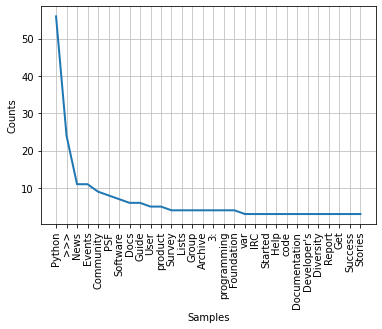

In [41]:
import nltk
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords  
import matplotlib
import matplotlib.pyplot as plt
import random

#nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


response=urllib.request.urlopen('http://python.org/') #웹에 정보를 요청한 후, 돌려받은 응답을 저장하여 ‘응답 객체(HTTPResponse)’를 반환한다.
html=response.read()
clean=BeautifulSoup(html,'html.parser').get_text() #html 코드 정제 진행

tokens=[]
for tok in clean.split():
  tokens.append(tok) #하나의 리스트로

stop=set(stopwords.words('english')) #불용어 

clean_tokens=[]
for tok in tokens:
  if len(tok.lower())>1 and (tok.lower() not in stop): #길이가 1 이상 인 것 !! stop word가 아닌 것 !
    clean_tokens.append(tok)

Freq_dist_nltk=nltk.FreqDist(clean_tokens) #FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다.
Freq_dist_nltk.plot(30, cumulative=False)

## 명사만 추출해보기

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


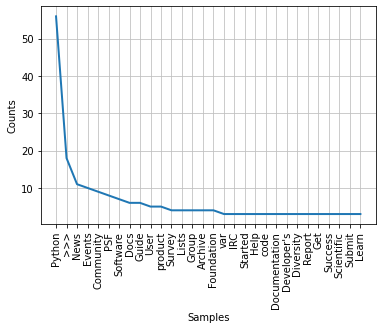

In [42]:
import nltk
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords  
import matplotlib
import matplotlib.pyplot as plt
import random

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


response=urllib.request.urlopen('http://python.org/') 
html=response.read()
clean=BeautifulSoup(html,'html.parser').get_text()   

tokens=[tok for tok in clean.split()]

stop=set(stopwords.words('english')) 

clean_tokens= [tok for tok in tokens if len(tok.lower())>1 and (tok.lower() not in stop)] 

tagged=nltk.pos_tag(clean_tokens)

allnoun=[]
for word,pos in tagged:
  if pos in ['NN','NNP']:
    allnoun.append(word)
    
Freq_dist_nltk = nltk.FreqDist(allnoun) 
Freq_dist_nltk.plot(30, cumulative=False)


## 한국어 형태소분석

In [1]:
# konlpy 패키지 다운로드
# Error 발생 시 다시 실행
!pip install konlpy

In [2]:
# konlpy 관련 패키지 import
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Komoran
from konlpy.tag import Twitter

kkma = Kkma()
okt = Okt()
komoran = Komoran()
hannanum = Hannanum()
twitter = Twitter()


# konlpy 중 Kkma는 문장 분리가 가능 (다른 라이브러리는 되지 않음)
print ("kkma 문장 분리 : ", kkma.sentences('네 안녕하세요 반갑습니다.'))

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


kkma 문장 분리 :  ['네 안녕하세요', '반갑습니다.']


In [3]:
# konlpy 의 라이브러리 형태소 분석 비교
print("okt 형태소 분석 :", okt.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("kkma 형태소 분석 : ", kkma.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("hannanum 형태소 분석 : ", hannanum.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("komoran 형태소 분석 : ", komoran.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("twitter 형태소 분석 : ", twitter.morphs(u"집에 가면 감자 좀 쪄줄래?"))

okt 형태소 분석 : ['집', '에', '가면', '감자', '좀', '쪄줄래', '?']
kkma 형태소 분석 :  ['집', '에', '가', '면', '감자', '좀', '찌', '어', '주', 'ㄹ래', '?']
hannanum 형태소 분석 :  ['집', '에', '가', '면', '감', '자', '좀', '찌', '어', '줄', '래', '?']
komoran 형태소 분석 :  ['집', '에', '가', '면', '감자', '좀', '찌', '어', '주', 'ㄹ래', '?']
twitter 형태소 분석 :  ['집', '에', '가면', '감자', '좀', '쪄줄래', '?']


In [4]:
# konlpy 의 라이브러리 품사태깅 비교
print("okt 품사태깅 :", okt.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("kkma 품사태깅 : ", kkma.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("hannanum 품사태깅 : ", hannanum.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("komoran 품사태깅 : ", komoran.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("twitter 품사태깅 : ", twitter.pos(u"집에 가면 감자 좀 쪄줄래?"))


okt 품사태깅 : [('집', 'Noun'), ('에', 'Josa'), ('가면', 'Noun'), ('감자', 'Noun'), ('좀', 'Noun'), ('쪄줄래', 'Verb'), ('?', 'Punctuation')]
kkma 품사태깅 :  [('집', 'NNG'), ('에', 'JKM'), ('가', 'VV'), ('면', 'ECE'), ('감자', 'NNG'), ('좀', 'MAG'), ('찌', 'VV'), ('어', 'ECS'), ('주', 'VXV'), ('ㄹ래', 'EFQ'), ('?', 'SF')]
hannanum 품사태깅 :  [('집', 'N'), ('에', 'J'), ('가', 'P'), ('면', 'E'), ('감', 'P'), ('자', 'E'), ('좀', 'M'), ('찌', 'P'), ('어', 'E'), ('줄', 'P'), ('래', 'E'), ('?', 'S')]
komoran 품사태깅 :  [('집', 'NNG'), ('에', 'JKB'), ('가', 'VV'), ('면', 'EC'), ('감자', 'NNP'), ('좀', 'MAG'), ('찌', 'VV'), ('어', 'EC'), ('주', 'VX'), ('ㄹ래', 'EF'), ('?', 'SF')]
twitter 품사태깅 :  [('집', 'Noun'), ('에', 'Josa'), ('가면', 'Noun'), ('감자', 'Noun'), ('좀', 'Noun'), ('쪄줄래', 'Verb'), ('?', 'Punctuation')]


In [25]:
import nltk
import ssl
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True